# Claims Description Analysis Using Text Mining / NLP for M

# Developed by Mahesh Valanju

## Import Required Libraries

In [1]:
import pandas as pd # Import pandas for data structures
import numpy as np # # Import numpy for numerical operations
import matplotlib.pyplot as plt # Import matplotlib for data visualization
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator # Import from wordcloud to generate wordcloud
# Display output inline
%matplotlib inline

## Import and View Data

In [2]:
# Import data and required column only
data = pd.read_excel(r"C:\Users\Mahesh S Valanju\Desktop\MnM\MnM_Man.xlsx", usecols = ['Cause Description'])
data.rename(columns = {'Cause Description' : 'Desc'}, inplace = True) # Rename column
data['Desc'] = data['Desc'].dropna()
data.head() # Display top 5 records

,Desc
0,THE IW REPORTED HE WAS WALKING BACK TO FORK LI...
1,IE WAS GETTING OFF A FORKLIFT FOOT SLIPPED AND...
2,IW WAS WALKING AROUND A SHEETING MACHINE WHEN ...
3,IW WAS HANDLING MATERIAL CONFIRMING ORDER IW T...
4,IW GOT FIBER GLASS DEBRIS IN EYE


In [3]:
data.info() # View information about the data like no. of records and type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56801 entries, 0 to 56800
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Desc    56801 non-null  object
dtypes: object(1)
memory usage: 443.9+ KB


## Cleaning Data

### 1. Convert to Lower Case

In [4]:
data['Desc'] = data['Desc'].str.lower() # Convert data to lower case
data.head() # Display top 5 records

,Desc
0,the iw reported he was walking back to fork li...
1,ie was getting off a forklift foot slipped and...
2,iw was walking around a sheeting machine when ...
3,iw was handling material confirming order iw t...
4,iw got fiber glass debris in eye


### 2. Remove Numbers

In [5]:
data['Desc'] = data['Desc'].str.replace('\d+', '') # Remove numbers
data.head() # Display top 5 records

C:\Users\Mahesh S Valanju\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


,Desc
0,the iw reported he was walking back to fork li...
1,ie was getting off a forklift foot slipped and...
2,iw was walking around a sheeting machine when ...
3,iw was handling material confirming order iw t...
4,iw got fiber glass debris in eye


### 3. Remove Punctuations 

In [6]:
import string # Import string for string manipulation
string.punctuation # Display punctuations

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [7]:
def remove_punctuation(text): # Define function to remove punctuations
    text_nopunt = "".join([c for c in text if c not in string.punctuation])  # Remove punctuation
    return text_nopunt # Return text

In [8]:
data['Desc'] = data['Desc'].apply(lambda x : remove_punctuation(x)) # Apply function on data
data.head() # Display top 5 records

,Desc
0,the iw reported he was walking back to fork li...
1,ie was getting off a forklift foot slipped and...
2,iw was walking around a sheeting machine when ...
3,iw was handling material confirming order iw t...
4,iw got fiber glass debris in eye


### 4. Removing Stop Words

In [9]:
import nltk # Import Natural Language Toolkit
nltk.download('stopwords') # From NLTK download stopwords
from nltk.corpus import stopwords # Import stopwords from NLTK corpus
stop = stopwords.words('english') # Assign english stopwords to variable stop
# stop # Display words in stop

[nltk_data] Downloading package stopwords to C:\Users\Mahesh S
[nltk_data]     Valanju\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
data['Desc'] = data['Desc'].apply(lambda x : ' '.join([word for word in x.split()
                                                      if word not in (stop)])) # Remove stopwords
data.head() # Display top 5 records

,Desc
0,iw reported walking back fork lift felt pop ri...
1,ie getting forklift foot slipped felt pain low...
2,iw walking around sheeting machine heard pop l...
3,iw handling material confirming order iw turne...
4,iw got fiber glass debris eye


### 5. Remove URLs / HTTPs

In [11]:
data['Desc'] = data['Desc'].str.replace(r'http\S+|www.\S+', '', case = False) # Remove hyperlinks
data.head() # Display top 5 records

C:\Users\Mahesh S Valanju\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


,Desc
0,iw reported walking back fork lift felt pop ri...
1,ie getting forklift foot slipped felt pain low...
2,iw walking around sheeting machine heard pop l...
3,iw handling material confirming order iw turne...
4,iw got fiber glass debris eye


### 6. Remove Common Words

In [12]:
import re # Import regular expression operations
nltk.download('words') # Download common words
words = set(nltk.corpus.words.words()) # Assign words from NLTK Corpus to words
# words # Display words in words

[nltk_data] Downloading package words to C:\Users\Mahesh S
[nltk_data]     Valanju\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


In [13]:
# Second round of cleaning data

def clean_text_round2(text): # Define function to clean data
    '''Get rid of some additional punctuation and non-sensical text that was missed the first time around.'''
    text =  re.sub('', '', text) # Enter text to be replaced
    text =  re.sub(r"\b[a-zA-Z]\b", "", text) # Single alphabets
    text =  re.sub(r"\b[a-zA-Z][a-zA-Z]\b", "", text) # 2 alphabets like ab or ad 
    
    text =  " ".join(w for w in nltk.wordpunct_tokenize(text)
                    if w.lower() in words) # Toeknize data
    return text # Return cleaned data

In [14]:
data['Desc'] = data['Desc'].apply(lambda x : clean_text_round2(x)) # Apply function to clean data
data.head() # Display top 5 records

,Desc
0,walking back fork lift felt pop right knee fel...
1,getting foot slipped felt pain lower back
2,walking around sheeting machine pop ankle felt...
3,handling material confirming order turned hit ...
4,got fiber glass debris eye


### 7. Stemming

In [15]:
import nltk # Import Natural Language Toolkit
from nltk.stem.snowball import SnowballStemmer # Import Snowball from Stem of NLTK

ss = SnowballStemmer('english') # Assign words from Snowball Stemmer to SS variable
w_tokenizer = nltk.tokenize.WhitespaceTokenizer() # Assign function which can tokenize data basis whitespaces
lemmatizer = nltk.stem.WordNetLemmatizer() # Assign lemmetizer from Stem to lemmatizer variable

def SnowballStemmer_text(text):
    return [ss.stem(w) for w in w_tokenizer.tokenize(text)] # Define function to tokenize data

data.head() # Display top 5 records

,Desc
0,walking back fork lift felt pop right knee fel...
1,getting foot slipped felt pain lower back
2,walking around sheeting machine pop ankle felt...
3,handling material confirming order turned hit ...
4,got fiber glass debris eye


In [16]:
data['Desc'] = data.Desc.apply(lambda x : ' '.join(SnowballStemmer_text(x))) # Apply function to tokenize data
data.head() # Display top 5 records

,Desc
0,walk back fork lift felt pop right knee fell f...
1,get foot slip felt pain lower back
2,walk around sheet machin pop ankl felt pain up...
3,handl materi confirm order turn hit right elbo...
4,got fiber glass debri eye


### 8. Lemmatization

In [17]:
import nltk # Import Natural Language Toolkit
from nltk.stem import WordNetLemmatizer # Import WordNetLemmatizer to lemmatize data
nltk.download('wordnet') # Download wordnet from NLTK
lemmatizer = WordNetLemmatizer() # Assign Word Net Lemmatizer to lemmatizer variable
w_tokenizer = nltk.tokenize.WhitespaceTokenizer() # Assign function which can tokenize data basis whitespaces

[nltk_data] Downloading package wordnet to C:\Users\Mahesh S
[nltk_data]     Valanju\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [18]:
def lemmatize_text(text):
    return [lemmatizer.lemmatize(w, 'v') for w in w_tokenizer.tokenize(text)] # Define function to lemmatize data

In [19]:
data['Desc'] = data.Desc.apply(lambda x : ' '.join(lemmatize_text(x))) # Apply function to lemmatize data
data.head() # Display top 5 records

,Desc
0,walk back fork lift felt pop right knee fell f...
1,get foot slip felt pain lower back
2,walk around sheet machin pop ankl felt pain up...
3,handl materi confirm order turn hit right elbo...
4,get fiber glass debri eye


### 9. Strip Extra White Spaces

In [20]:
data['Desc'] = data['Desc'].astype('str').str.rstrip() # Strip extra white spaces
data.head() # Display top 5 records

,Desc
0,walk back fork lift felt pop right knee fell f...
1,get foot slip felt pain lower back
2,walk around sheet machin pop ankl felt pain up...
3,handl materi confirm order turn hit right elbo...
4,get fiber glass debri eye


## Term Document Matrix

In [21]:
from sklearn.feature_extraction.text import CountVectorizer # Import Count Vectorizer to convert text into vectors

cv = CountVectorizer(stop_words = 'english') # Assign english stopwords to variable CV
data_cv = cv.fit_transform(data['Desc']) # Assign and fit transform data to variable data_cv 
data_dtm = pd.DataFrame(data_cv.toarray(), columns = cv.get_feature_names()) # Create a document term  matrix

tdm = data_dtm.transpose() # Tranpose document term matrix to term document matrix
tdm.head() # Display top 5 records

,0,1,2,3,4,5,6,7,8,9,...,56791,56792,56793,56794,56795,56796,56797,56798,56799,56800
abdomen,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
abdomin,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
abduct,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
abil,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
abl,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
tdm['freq'] = tdm.sum(axis = 1) # Add a column which will sum up frequency of token occurance
tdm.head() # Display top 5 records

,0,1,2,3,4,5,6,7,8,9,...,56792,56793,56794,56795,56796,56797,56798,56799,56800,freq
abdomen,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,384
abdomin,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,125
abduct,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
abil,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
abl,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,211


In [23]:
tdm.reset_index(inplace = True) # Reset index to the words
tdm.head() # Display top 5 records

,index,0,1,2,3,4,5,6,7,8,...,56792,56793,56794,56795,56796,56797,56798,56799,56800,freq
0,abdomen,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,384
1,abdomin,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,125
2,abduct,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,abil,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
4,abl,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,211


## Wordcloud

In [24]:
text = " ".join(review for review in data['Desc']) # Assign cleaned data to the variable text
print("There are {} words in the combination of all review.".format(len(text))) # Display the no. of words

There are 2841978 words in the combination of all review.


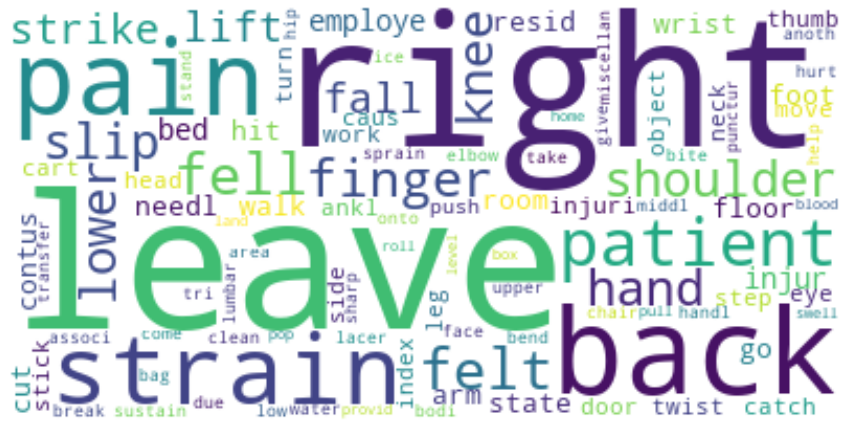

In [25]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator # Import wordcloud to prepare wordcloud
import matplotlib.pyplot as plt # Import matplotlib for data visualization

stopwords = set(STOPWORDS) # Set stopwords

plt.figure(figsize = (15,10)) # Define picture size
wordcloud = WordCloud(stopwords = stopwords,
                      background_color = "white",
                      collocations = False,
                       max_words = 100).generate(text) # Prepare a wordcloud and set parameters

plt.imshow(wordcloud, interpolation = 'bilinear') # Show wordcloud
plt.axis("off") # Set axis to off
plt.show() # Display picture